In [67]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import inaugural, stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [68]:
speeches = [inaugural.raw(fileid) for fileid in inaugural.fileids()]
labels = [fileid[:-4] for fileid in inaugural.fileids()]

In [69]:
stop_words = set(stopwords.words('english'))

In [70]:
def vectorize_texts(speeches, remove_stopwords=False):
    if remove_stopwords:
        vectorizer = CountVectorizer(stop_words=list(stop_words))
    else:
        vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(speeches)
    return vectors.toarray()

In [71]:
vec_with_fw= vectorize_texts(speeches, remove_stopwords=False)
vec_without_fw = vectorize_texts(speeches, remove_stopwords=True)

In [72]:
dot_with_fw = vec_with_fw @ vec_with_fw.T
cosine_with_fw = cosine_similarity(vec_with_fw)
dot_without_fw = vec_without_fw @ vec_without_fw.T
cosine_without_fw = cosine_similarity(vec_without_fw)

In [75]:
def plot_heatmap(matrix, title, labels):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, cmap="coolwarm",  cbar=True)
    plt.title(title)
    plt.savefig("plots/" + title.replace(' ', '_') + '.png')
    plt.show()

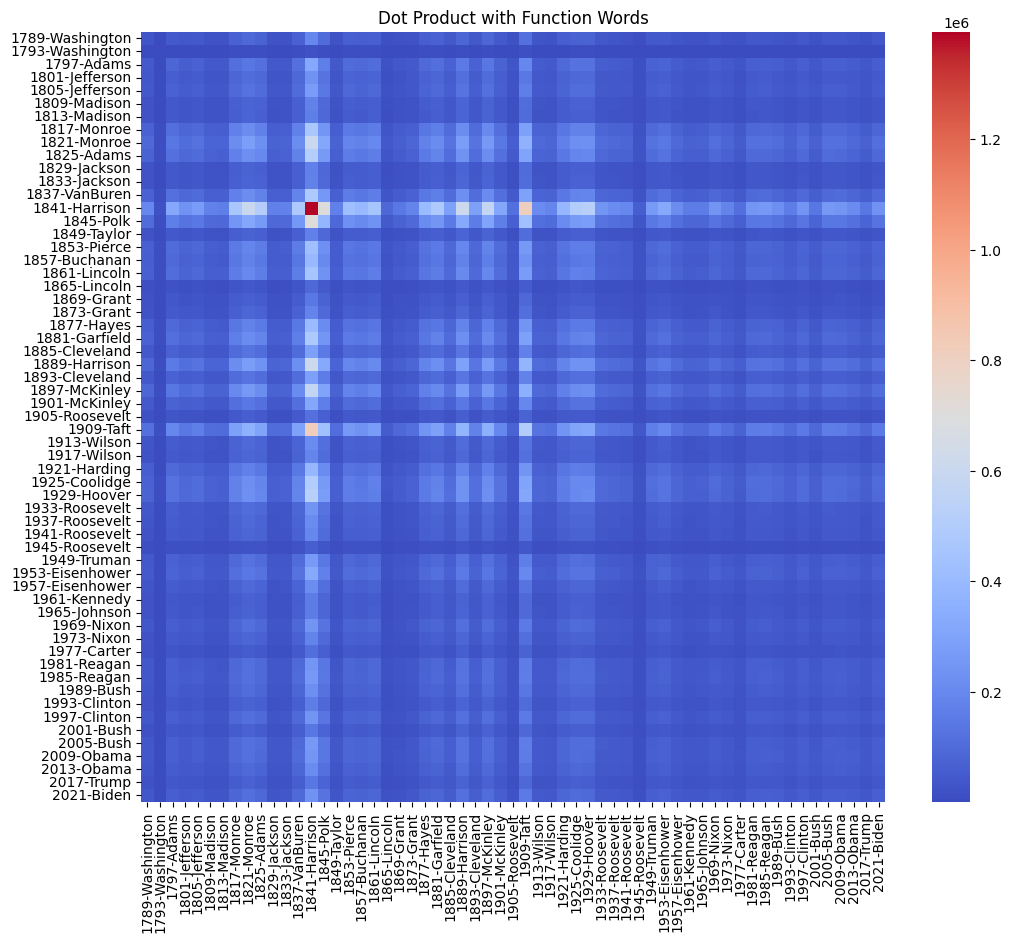

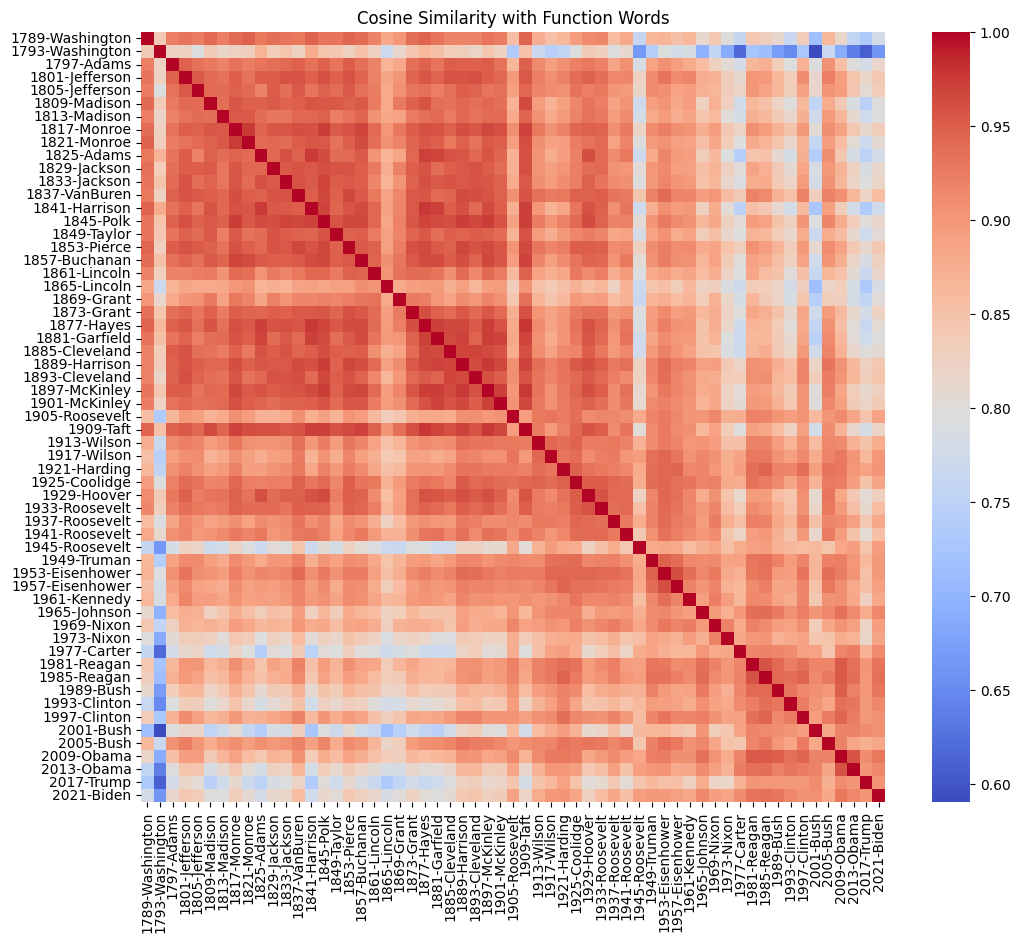

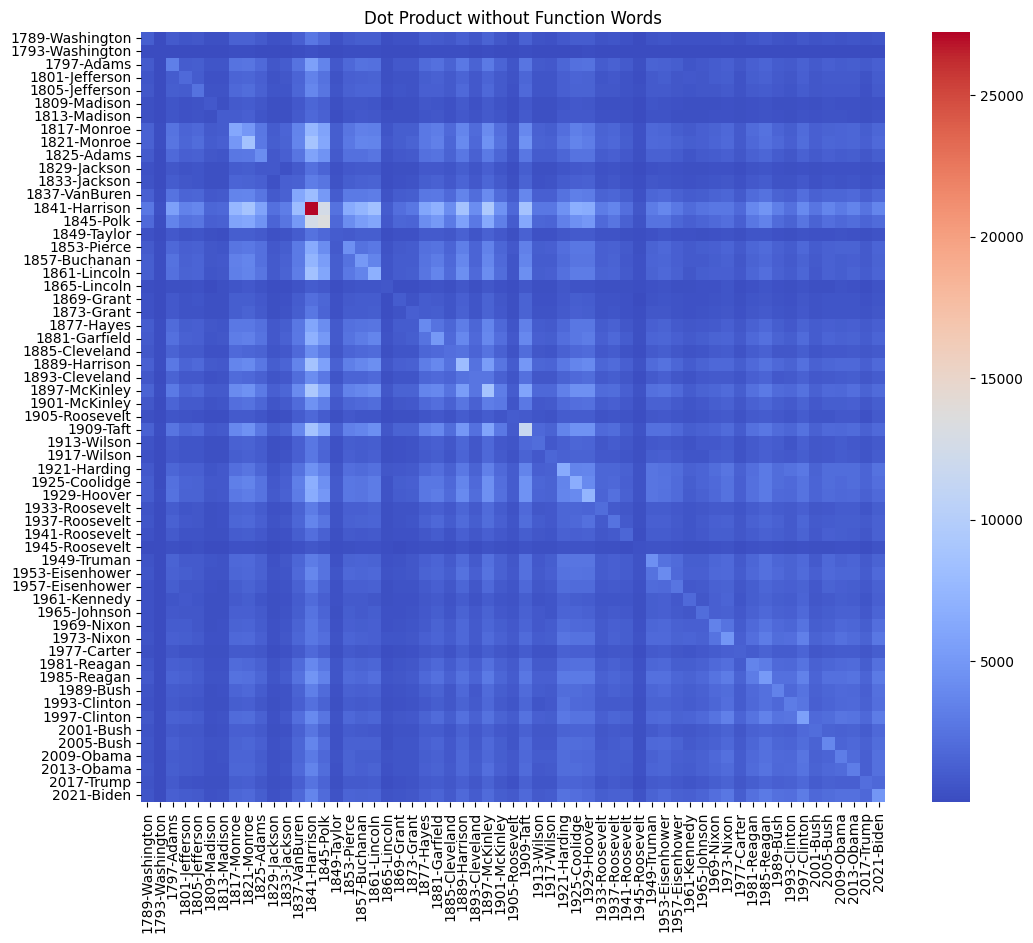

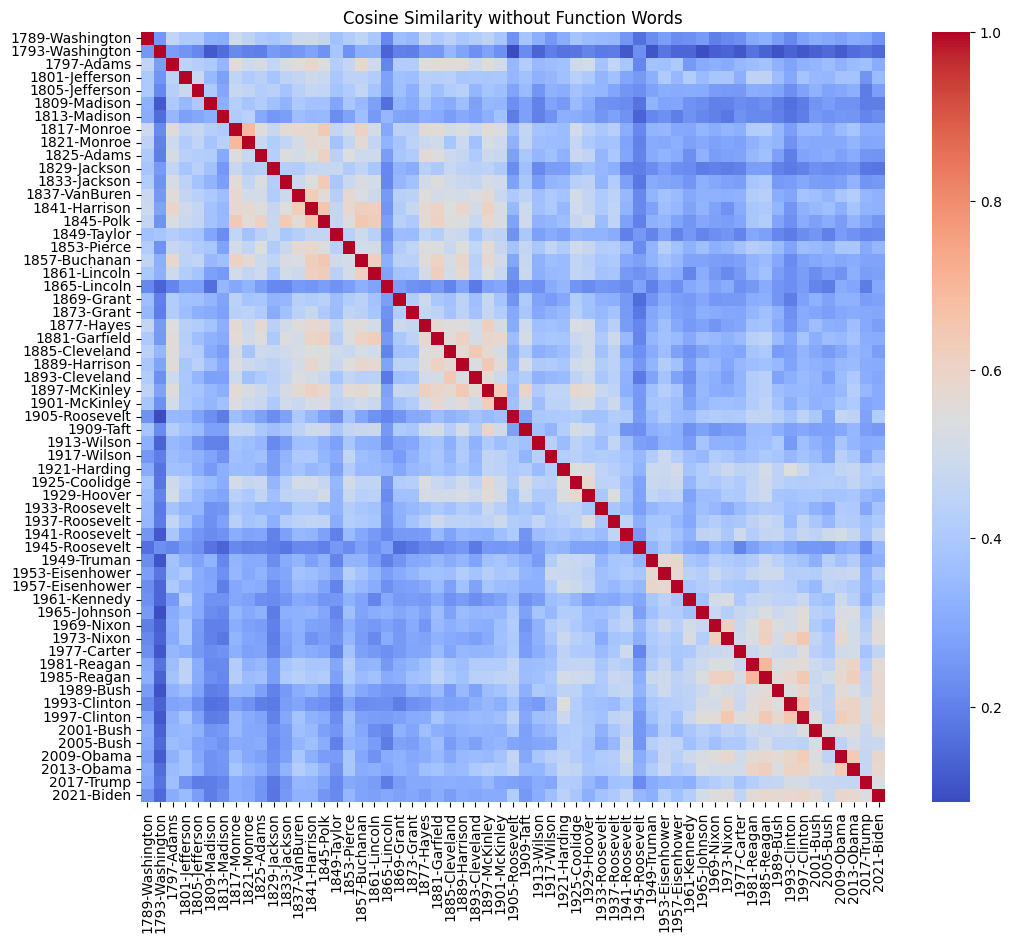

In [76]:
plot_heatmap(dot_with_fw, "Dot Product with Function Words", labels)
plot_heatmap(cosine_with_fw, "Cosine Similarity with Function Words", labels)
plot_heatmap(dot_without_fw, "Dot Product without Function Words", labels)
plot_heatmap(cosine_without_fw, "Cosine Similarity without Function Words", labels)